In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('original/ArchiveII_with_prob_and_motiv.csv')

In [2]:
print(df.sample(3))

                           id  \
2939  5s_Pythium-pachycaule-1   
3177          RNaseP_SM-A1831   
2089      5s_Xenopus-laevis-6   

                                               sequence  \
2939  GUAGACGGCCAUCUUAGGCUGAGAACACCGUAUCCCGUCCGCUCUG...   
3177  GAGGAAAGUCCGGGCUCCAUGGAAGCGCGGUGCCGGAUAACGUCCG...   
2089  GCCUACGGCCACACCACCCUGAAAGUGCCCGAUCUCGUCUGAUCUC...   

                                              structure  \
2939  (((((((((....((((((((.....((((((............))...   
3177  .....(((.(((((((((.<<<<<<<.((((((((((.....))))...   
2089  (((((((((....((((((((.....((((((............))...   

                                             base_pairs  len  \
2939  [[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...  118   
3177  [[6, 339], [7, 338], [8, 337], [10, 336], [11,...  340   
2089  [[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...  121   

                                                motivos     fam  \
2939  SSSSSSSSSMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHHSS...      5s   
31

In [44]:
import pandas as pd
import numpy as np
import ast

# Función para calcular los promedios de pseudo_probe por terna
def calculate_avg_pseudo_probe(sequence, pseudo_probe):
    # Asegurarse de que pseudo_probe sea una lista de valores numéricos
    if isinstance(pseudo_probe, str):
        # Si pseudo_probe es una cadena, intentar convertirla a lista
        try:
            pseudo_probe = ast.literal_eval(pseudo_probe)  # Convierte la cadena a lista
        except Exception as e:
            raise ValueError(f"Error al convertir pseudo_probe de cadena a lista: {e}")
    
    # Verificar que pseudo_probe es una lista con la misma longitud que la secuencia
    if not isinstance(pseudo_probe, list) or len(pseudo_probe) != len(sequence):
        raise ValueError(f"pseudo_probe debe ser una lista con la misma longitud que la secuencia, pero se encontró {type(pseudo_probe)} con longitud {len(pseudo_probe)}")
    
    # Dividir la secuencia en ternas (subcadenas de longitud 3)
    ternas = [sequence[i:i+3] for i in range(len(sequence) - 2)]
    
    # Asegurarse de que pseudo_probe esté en formato numérico y se alinee con las ternas
    pseudo_probe = np.array(pseudo_probe)
    
    # Calcular el promedio de los valores en pseudo_probe para cada terna
    avg_pseudo_probe = []
    for i in range(len(ternas)):
        # Obtener los valores de pseudo_probe para las posiciones correspondientes a la terna
        probe_values = pseudo_probe[i:i+3]
        avg_pseudo_probe.append(np.mean(probe_values))
    
    return ternas, avg_pseudo_probe

# Aplicar la función a cada fila del dataframe
df['ternas'], df['avg_pseudo_probe'] = zip(*df.apply(lambda row: calculate_avg_pseudo_probe(row['sequence'], row['pseudo_probe']), axis=1))

# Mostrar el resultado
df[['ternas', 'avg_pseudo_probe']]


,ternas,avg_pseudo_probe
0,"[UCU, CUG, UGG, GGU, GUG, UGA, GAC, ACG, CGA, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666..."
1,"[UGC, GCC, CCU, CUG, UGA, GAU, AUG, UGA, GAC, ...","[0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,"[GGG, GGG, GGU, GUC, UCG, CGU, GUU, UUA, UAC, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, ..."
3,"[UCC, CCG, CGU, GUU, UUG, UGU, GUG, UGG, GGU, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, ..."
4,"[UGG, GGG, GGU, GUU, UUG, UGA, GAU, AUG, UGA, ...","[0.3333333333333333, 0.6666666666666666, 0.666..."
...,...,...
3859,"[UGG, GGU, GUA, UAA, AAU, AUG, UGA, GAU, AUG, ...","[1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.333..."
3860,"[GGG, GGG, GGA, GAC, ACC, CCC, CCC, CCG, CGC, ...","[1.0, 1.0, 0.6666666666666666, 0.3333333333333..."
3861,"[GGG, GGG, GGC, GCU, CUG, UGA, GAC, ACU, CUU, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, ..."
3862,"[GGA, GAU, AUG, UGC, GCG, CGA, GAU, AUC, UCA, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.66666666..."


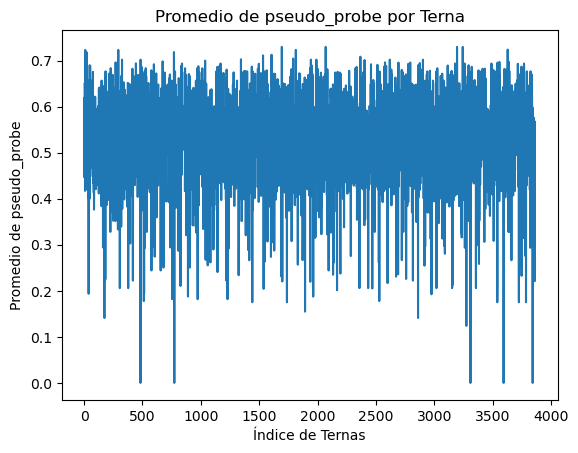

In [49]:
import matplotlib.pyplot as plt

# Asegurarse de que 'avg_pseudo_probe' contenga un solo valor numérico por fila (promedio de las ternas)
df['avg_pseudo_probe_mean'] = df['avg_pseudo_probe'].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

# Convertir ternas en un formato indexado (por ejemplo, cada terna con su índice)
df['ternas_indexed'] = [i for i in range(len(df))]

# Crear el gráfico
plt.plot(df['ternas_indexed'], df['avg_pseudo_probe_mean'])

# Etiquetas y título
plt.xlabel('Índice de Ternas')
plt.ylabel('Promedio de pseudo_probe')
plt.title('Promedio de pseudo_probe por Terna')

# Mostrar el gráfico
plt.show()


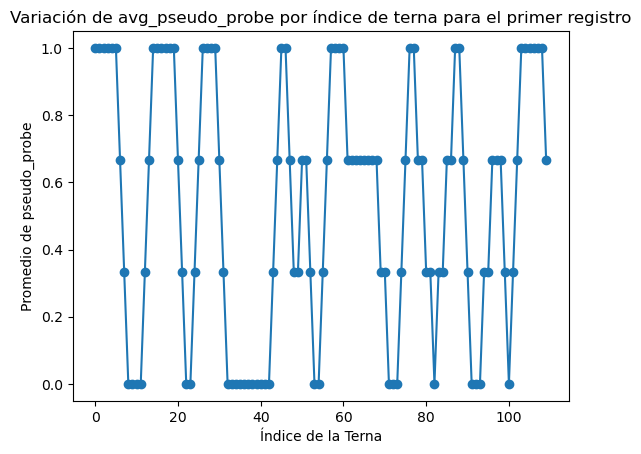

In [51]:
import matplotlib.pyplot as plt

# Extraer las ternas y sus promedios para el primer registro
ternas_first_record = df['ternas'][0]  # Ternas del primer registro
avg_pseudo_probe_first_record = df['avg_pseudo_probe'][0]  # Promedios de pseudo_probe del primer registro

# Crear el gráfico: índice de las ternas en el eje x y el promedio de pseudo_probe en el eje y
plt.plot(range(len(ternas_first_record)), avg_pseudo_probe_first_record, marker='o')

# Etiquetas y título
plt.xlabel('Índice de la Terna')
plt.ylabel('Promedio de pseudo_probe')
plt.title('Variación de avg_pseudo_probe por índice de terna para el primer registro')

# Mostrar el gráfico
plt.show()
